In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Data Loading

In [10]:
df = pd.read_csv(r"C:\Users\arjun\Downloads\archive (3)\spam.csv", encoding="ISO-8859-1")  # Try this first
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Preprocessing

In [11]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
df['v1']=df['v1'].map({'ham': 0, 'spam': 1})

In [15]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Model Training

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.87      0.93      0.90       149

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



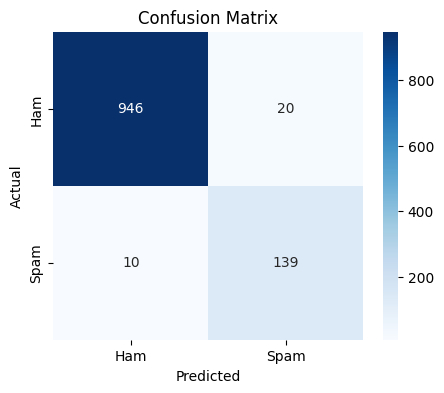

In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['v2'])  # Replace 'message' with your text column
y = df['v1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Training Accuracy
train_accuracy = nb.score(X_train_bal, y_train_bal)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Testing Accuracy
test_accuracy = nb.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Compare Train & Test Accuracy
if train_accuracy - test_accuracy > 0.1:  # 10% difference is a sign of overfitting
    print("Potential Overfitting Detected!")
else:
    print("No Overfitting Detected.")


Training Accuracy: 0.99
Testing Accuracy: 0.97
No Overfitting Detected.


# Testing Model

In [19]:
sample_text = ["Congratulations! 🎉 You have won a FREE iPhone 15! Click the link below to claim your prize now. Hurry, limited time offer! 👉 http://fake-prize.com"]

# Convert to numerical features (Assuming you used TF-IDF or CountVectorizer)
sample_text_vectorized = vectorizer.transform(sample_text)  

# Predict
prediction = nb.predict(sample_text_vectorized)

# Output Result
print("Spam" if prediction[0] == 1 else "Not Spam")


Spam


In [21]:
# Example message to test (Non-Spam)
test_message = ["Hey, are we still meeting for lunch at 1 PM? Let me know if you’re running late!"]

# Convert text into numerical features (assuming you used TF-IDF or CountVectorizer)
test_message_transformed = vectorizer.transform(test_message)  # Use the same vectorizer from training

# Predict using the trained model
prediction = nb.predict(test_message_transformed)

# Output result
print("Spam" if prediction[0] == 1 else "Not Spam")


Not Spam


# Detailed Report

# Spam Classification Model

This repository contains a machine learning model for classifying text messages as either spam or ham (non-spam). The model uses Natural Language Processing (NLP) techniques and a Multinomial Naive Bayes classifier to accurately detect spam messages.

## Table of Contents
- [Overview](#overview)
- [Data Loading and Exploration](#data-loading-and-exploration)
- [Data Preprocessing](#data-preprocessing)
- [Feature Extraction](#feature-extraction)
- [Model Training](#model-training)
- [Handling Class Imbalance](#handling-class-imbalance)
- [Model Evaluation](#model-evaluation)
- [Testing the Model](#testing-the-model)
- [Explanation of Evaluation Metrics](#explanation-of-evaluation-metrics)
- [Overfitting Analysis](#overfitting-analysis)

## Overview

Spam detection is a classic problem in text classification. This project implements a spam classifier using the following key components:
- TF-IDF vectorization for text feature extraction
- SMOTE for handling class imbalance
- Multinomial Naive Bayes algorithm for classification
- Comprehensive evaluation metrics to measure performance

## Data Loading and Exploration

```python
df = pd.read_csv(r"C:\Users\arjun\Downloads\archive (3)\spam.csv", encoding="ISO-8859-1")
```

**Why**: We begin by loading the dataset from a CSV file using pandas. The specific encoding (ISO-8859-1) is specified to handle special characters that might be present in text messages.

Initial exploration of the data (`df.head()`) shows the structure of the dataset, which contains:
- A label column ('v1') with values 'ham' or 'spam'
- A text message column ('v2')
- Several unnamed columns that don't contain relevant information

## Data Preprocessing

```python
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
```

**Why**: Preprocessing is crucial for preparing the data for machine learning:
1. Removing unnecessary columns reduces noise and improves model efficiency
2. Converting categorical labels ('ham'/'spam') to numerical values (0/1) is required for most machine learning algorithms

Class distribution analysis (`df['v1'].value_counts()`) reveals a significant imbalance:
- Ham (non-spam) messages: 4825
- Spam messages: 747

This imbalance is important to address during model training.

## Feature Extraction

```python
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['v2'])
```

**Why**: Text data must be converted to numerical format for machine learning algorithms:

- **TF-IDF Vectorization**: Converts text into numerical features by calculating:
  - Term Frequency (TF): How frequently a word appears in a message
  - Inverse Document Frequency (IDF): How rare or common a word is across all messages
  
- **Benefits of TF-IDF**:
  - Assigns higher weights to words that are distinctive to a particular class
  - Reduces the importance of common words that appear across all text messages
  - Handles the removal of English stop words (common words like 'and', 'the', etc.) to focus on meaningful content

## Model Training

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
```

**Why**: Splitting the data ensures we can evaluate the model's performance on unseen data:
- 80% of data used for training the model
- 20% reserved for testing
- `stratify=y` ensures that the class distribution is maintained in both sets
- `random_state=42` ensures reproducibility of results

## Handling Class Imbalance

```python
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
```

**Why**: The dataset has significantly more ham messages than spam messages. This imbalance can bias the model toward the majority class (ham).

- **SMOTE (Synthetic Minority Over-sampling Technique)**:
  - Creates synthetic examples of the minority class (spam)
  - Helps balance the training data
  - Improves the model's ability to detect spam messages
  - Does not modify the test set, maintaining a realistic evaluation scenario

## Classification Algorithm

```python
nb = MultinomialNB()
nb.fit(X_train_bal, y_train_bal)
```

**Why**: Multinomial Naive Bayes is chosen for several reasons:
- It works well with text classification problems
- It's computationally efficient
- It performs well with high-dimensional data like TF-IDF vectors
- It's particularly effective for document classification tasks
- It handles the probabilistic nature of spam detection well

## Model Evaluation

```python
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
```

**Why**: Comprehensive evaluation provides insights into various aspects of model performance:
- Overall accuracy
- Class-specific metrics (precision, recall, F1-score)
- Visualization of results via confusion matrix

## Testing the Model

```python
sample_text = ["Congratulations! 🎉 You have won a FREE iPhone 15! Click the link below to claim your prize now. Hurry, limited time offer! 🎉 http://fake-prize.com"]
sample_text_vectorized = vectorizer.transform(sample_text)
prediction = nb.predict(sample_text_vectorized)
```

**Why**: Real-world testing with new examples demonstrates practical application:
- Tests the model with obvious spam and non-spam examples
- Verifies the model's ability to generalize to new, unseen data
- Confirms the entire pipeline (vectorization + classification) works correctly

## Explanation of Evaluation Metrics

### Accuracy (97%)
- **What it is**: The proportion of correctly classified messages (both spam and ham) out of all messages
- **Why it matters**: Provides an overall measure of model performance
- **Interpretation**: The model correctly classifies 97% of all messages

### Precision
- **For Ham (0.99)**: 
  - **What it is**: When the model predicts a message is ham, it's correct 99% of the time
  - **Why it matters**: High precision for ham means users rarely miss legitimate messages

- **For Spam (0.87)**:
  - **What it is**: When the model predicts a message is spam, it's correct 87% of the time
  - **Why it matters**: Lower precision for spam means some legitimate messages might be misclassified as spam

### Recall
- **For Ham (0.98)**:
  - **What it is**: The model correctly identifies 98% of all actual ham messages
  - **Why it matters**: High ham recall means most legitimate messages are correctly classified

- **For Spam (0.93)**:
  - **What it is**: The model correctly identifies 93% of all actual spam messages
  - **Why it matters**: High spam recall means most spam messages are caught

### F1-Score
- **What it is**: The harmonic mean of precision and recall
- **Why it matters**: Balances the trade-off between precision and recall
- **Interpretation**: 
  - Ham F1-score (0.98): Excellent balance between precision and recall for ham
  - Spam F1-score (0.90): Good balance between precision and recall for spam

### Confusion Matrix
- **What it is**: A table showing the counts of true positives, false positives, true negatives, and false negatives
- **Why it matters**: Visualizes where the model makes errors
- **Interpretation**: The heatmap shows the distribution of correct and incorrect predictions

## Overfitting Analysis

```python
train_accuracy = nb.score(X_train_bal, y_train_bal)  # 0.99
test_accuracy = nb.score(X_test, y_test)             # 0.97
```

**Why**: Comparing training and testing accuracy helps detect overfitting:
- Training accuracy (0.99): How well the model performs on data it has seen
- Testing accuracy (0.97): How well the model generalizes to new data
- Difference (0.02 or 2%): Small difference indicates minimal overfitting
- Conclusion: "No Overfitting Detected" because the difference is less than 10%

## Conclusion

The spam classification model achieves high accuracy (97%) with a good balance between precision and recall for both spam and ham classes. The small difference between training and testing accuracy suggests the model generalizes well to new data without overfitting. The model successfully classifies obvious examples of both spam and non-spam messages in the final testing phase.